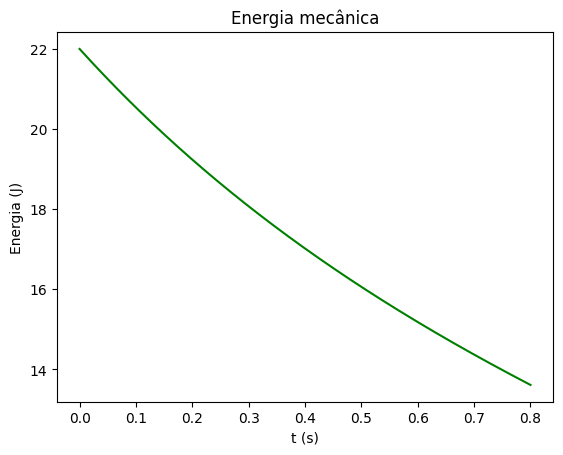

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#bola de tenis com rotação

# Parâmetros
dt = 0.0001
t0 = 0
tf = 0.8
g = 9.8 # Aceleração gravítica

m = 0.057 # Massa do corpo
x0 = np.array([0, 0]) # Posição inicial

# Velocidade inicial
angle = np.radians(10)
v0Norm = 250/9
v0 = np.array([
    v0Norm * np.cos(angle),
    v0Norm * np.sin(angle)
])

# Constantes para a resistência do ar
vT = 250/9 # velocidade terminal
D = g/vT**2

# Esta função calcula a força da resistência do ar a partir da velocidade atual
def forcaRes(v):
    vNorm = np.linalg.norm(v)
    vHat = v / vNorm
    return -m * D * vNorm** 2 * vHat

# Esta função calcula a aceleração a partir da velocidade atual
def accel(v):
    return np.array([0, -g]) + forcaRes(v)/m

def energiaMecanica(x, v):
    # Energia cinética
    E_c = 1/2 * m * np.linalg.norm(v)**2
    # Energia potencial
    E_p = m * g * x[1]
    # Energia mecânica
    return E_c + E_p
    

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
# Movimento 2D
shape = (n + 1, 2)

a = np.zeros(shape)
v = np.zeros(shape)
x = np.zeros(shape)
t = np.zeros(n + 1)

E_m = np.zeros(n + 1)

# Valores iniciais
a[0] = accel(v0)
v[0] = v0
x[0] = x0
t[0] = t0

E_m[0] = energiaMecanica(x0, v0)

for i in range(n):
    a[i + 1] = accel(v[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt
    
    E_m[i + 1] = energiaMecanica(x[i + 1], v[i + 1])
plt.plot(t, E_m, "g")
plt.xlabel("t (s)")
plt.ylabel("Energia (J)")
plt.title("Energia mecânica")
plt.show()


In [2]:
F_res = np.zeros(shape)

# Valores iniciais
F_res[0] = forcaRes(v0)

# Voltar a fazer o método de euler mas apenas para a força da resistência do ar, pois os outros valores já foram calculados
for i in range(n):
    F_res[i + 1] = forcaRes(v[i])

# O trabalho é dado pela força * velocidade, logo fazemos já a multiplicação dos dois arrays
F_times_v = F_res * v

# Loop pelos instantes que queremos medir
for t_i in [0, 0.4, 0.8]:
    # Número de passos a considerar com base no tempo final pretendido
    n_i = int((t_i - t0) / dt)
    
    # Cálculo dos integrais para cada componente do movimento
    W_res_x = dt * ((F_times_v[0, 0] + F_times_v[n_i, 0]) * 0.5 + np.sum(F_times_v[1:n_i, 0]))
    W_res_y = dt * ((F_times_v[0, 1] + F_times_v[n_i, 1]) * 0.5 + np.sum(F_times_v[1:n_i, 1]))
    
    # Trabalho como a soma do trabalho em cada componente
    W_res = W_res_x + W_res_y
    
    print(f"{t_i:0.1f}: {W_res} J")

0.0: -0.0015516666666666665 J
0.4: -4.977118695214646 J
0.8: -8.37978913965506 J
